## EE346 Lab 5
2023-10-31  
Christopher Tinker, Ethan Robson, Eli Haushalter  

Text(0, 0.5, '$I_D$ (A)')

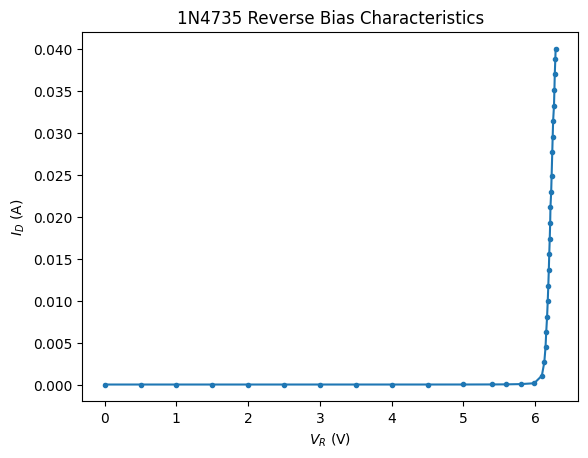

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# read part 1 data
df = pd.read_csv("ee346-lab5.csv")
df.head()
i_d = [_ / 100 for _ in df["Vr"]]

plt.plot(df["Vz"], i_d, '.-')
plt.title(r"1N4735 Reverse Bias Characteristics")
plt.xlabel(r"$V_R$ (V)")
plt.ylabel(r"$I_D$ (A)")



### Circuit 2
$R_L$ = 1 kOhm  
$R_s$ = 404 Ohm    

(6.0, 6.5)

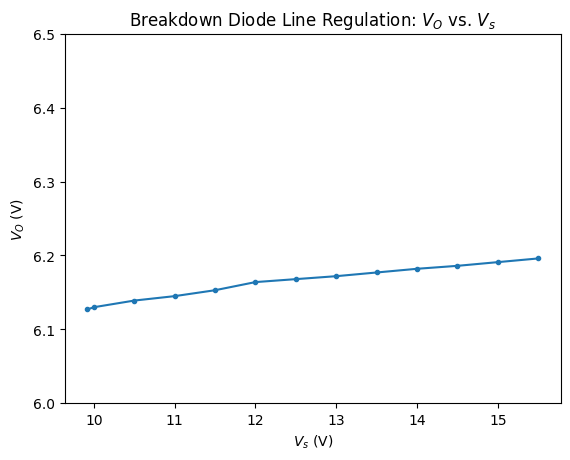

In [7]:
# truncate df["Vs"]

# graph the nonzero ones
df_circ2 = df[df["Vs"] != '']
plt.plot(df_circ2["Vs"], df_circ2["Vo"], '.-')
plt.title(r"Breakdown Diode Line Regulation: $V_O$ vs. $V_s$")
plt.xlabel(r"$V_s$ (V)")
plt.ylabel(r"$V_O$ (V)")
plt.ylim(6, 6.5)

(5.0, 7.0)

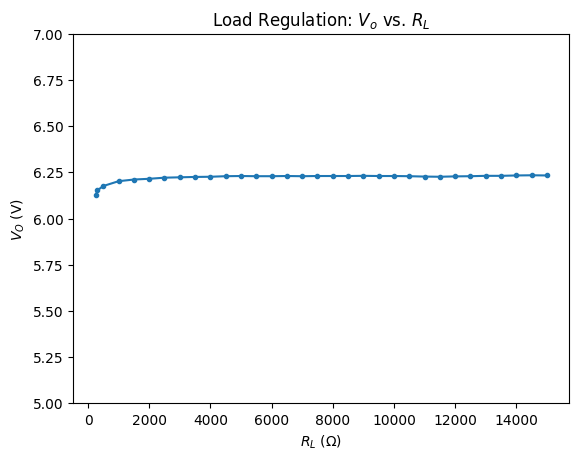

In [15]:
# filter df
df_part4 = df[df["RL"] != '']

plt.plot(df["RL"], df["Vo_part4"], '.-')
plt.title(r"Load Regulation: $V_o$ vs. $R_L$")
plt.xlabel(r"$R_L$ $(\Omega)$")
plt.ylabel(r"$V_O$ (V)")
plt.ylim(5, 7)

### Load-Line Analysis w/ Reverse Bias Characteristics

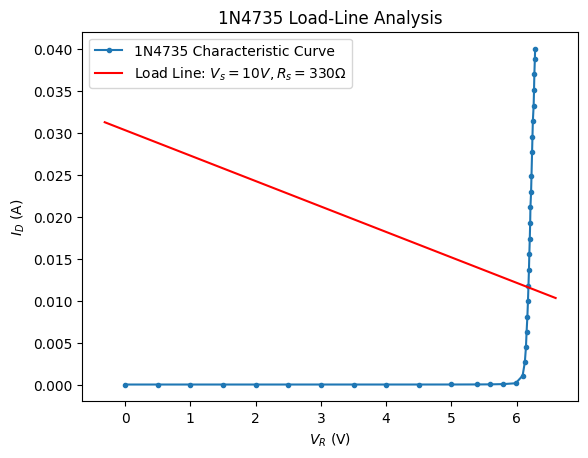

In [19]:
# load line analysis
# plot reverse bias characteristics again
plt.plot(df["Vz"], i_d, '.-', label="1N4735 Characteristic Curve")
plt.title(r"1N4735 Load-Line Analysis")
plt.xlabel(r"$V_R$ (V)")
plt.ylabel(r"$I_D$ (A)")

# get current xlim and ylim
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
v_ll = np.linspace(x_min, x_max, 100) # linspace over the voltage axis
i_ll = (10 - v_ll) / 330

plt.plot(v_ll, i_ll, "r-", label=r"Load Line: $V_s = 10 V, R_s = 330 \Omega$")
plt.legend()

[6.18028333] [0.0115749]
Static Resistance: [533.93842475]
Dynamic Resistance: [3.44647656]


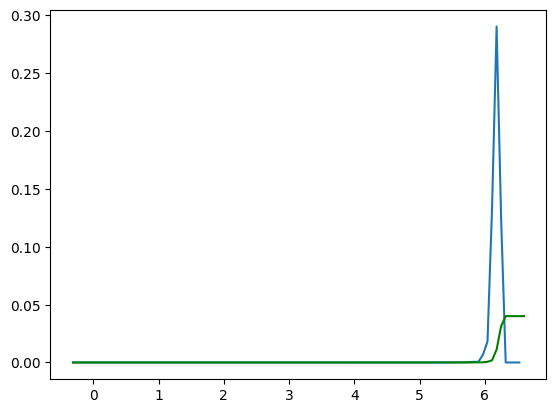

In [40]:
# find diode operating point, static resistance, and dynamic resistance
# first, reinterpolate experimental data
i_d_interp = np.interp(v_ll, np.flip(df["Vz"]), np.flip(i_d))
idx = np.argwhere(np.diff(np.sign(i_ll - i_d_interp))).flatten()
v_op, i_op = v_ll[idx], i_ll[idx]
print(v_op, i_op)
r_static = v_op / i_op
print("Static Resistance:", r_static)
r_dynamic = (np.diff(i_d_interp) / np.diff(v_ll))
#print([r_dynamic[_] for _ in range(len(r_dynamic)) if abs(idx - _) <= 1])
plt.plot(v_ll[:len(v_ll) - 1], r_dynamic)
plt.plot(v_ll, i_d_interp, "g-")
print("Dynamic Resistance:", 1 / r_dynamic[idx])

## Results
Operating point: {{v_op}} V, {{i_op}} A
Static resistance: {{r_static}} $\Omega$